# Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease

In [17]:
# import required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [18]:
data=pd.read_csv("E:\Imarticus\Machine Learning\Supervised Learning\Decision Tree\Heart Disease Prediction\Dataset/HeartDisease.csv")

In [19]:
df=pd.DataFrame(data)

In [20]:
df

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
df.shape #shape of dataset

(303, 14)

In [22]:
# exploring the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [24]:
df.describe(include = 'all') 

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [25]:
df.columns.nunique()

14

In [26]:
# cecking for missing values:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

<AxesSubplot:>

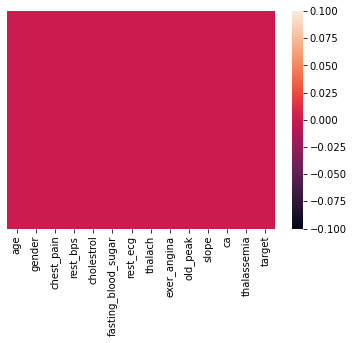

In [27]:
sns.heatmap(df.isnull(),yticklabels=False)

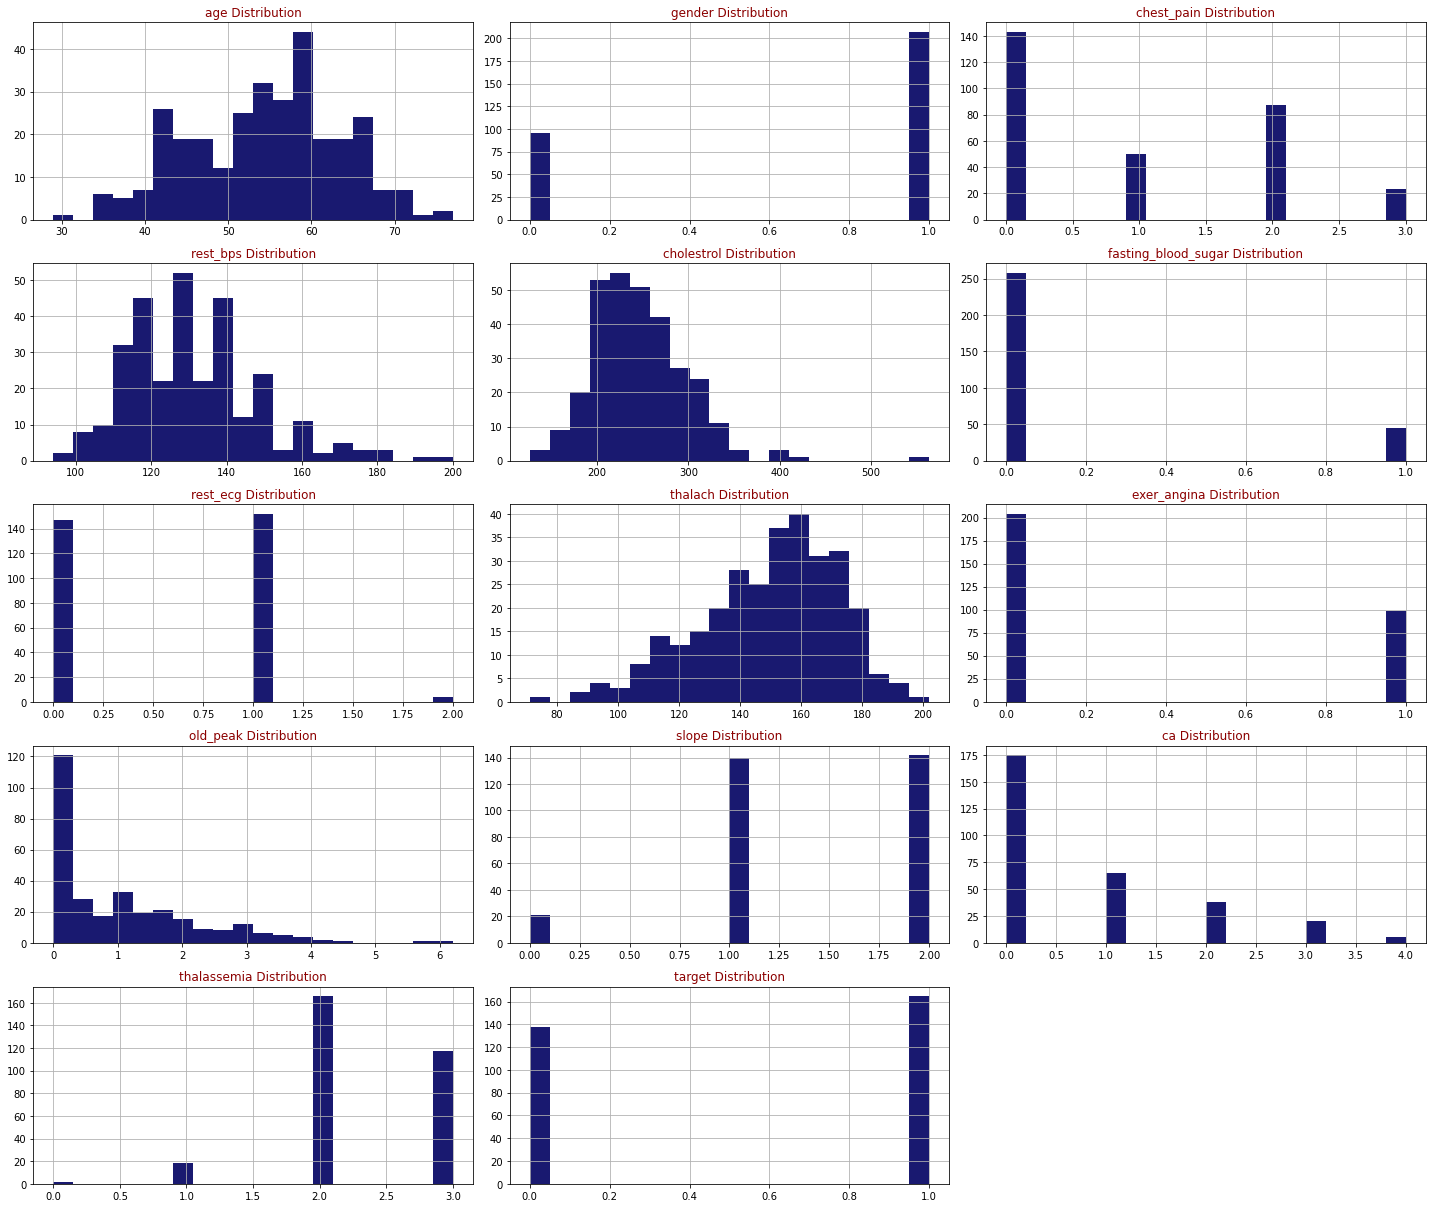

In [28]:
# visualising the distribution of data
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

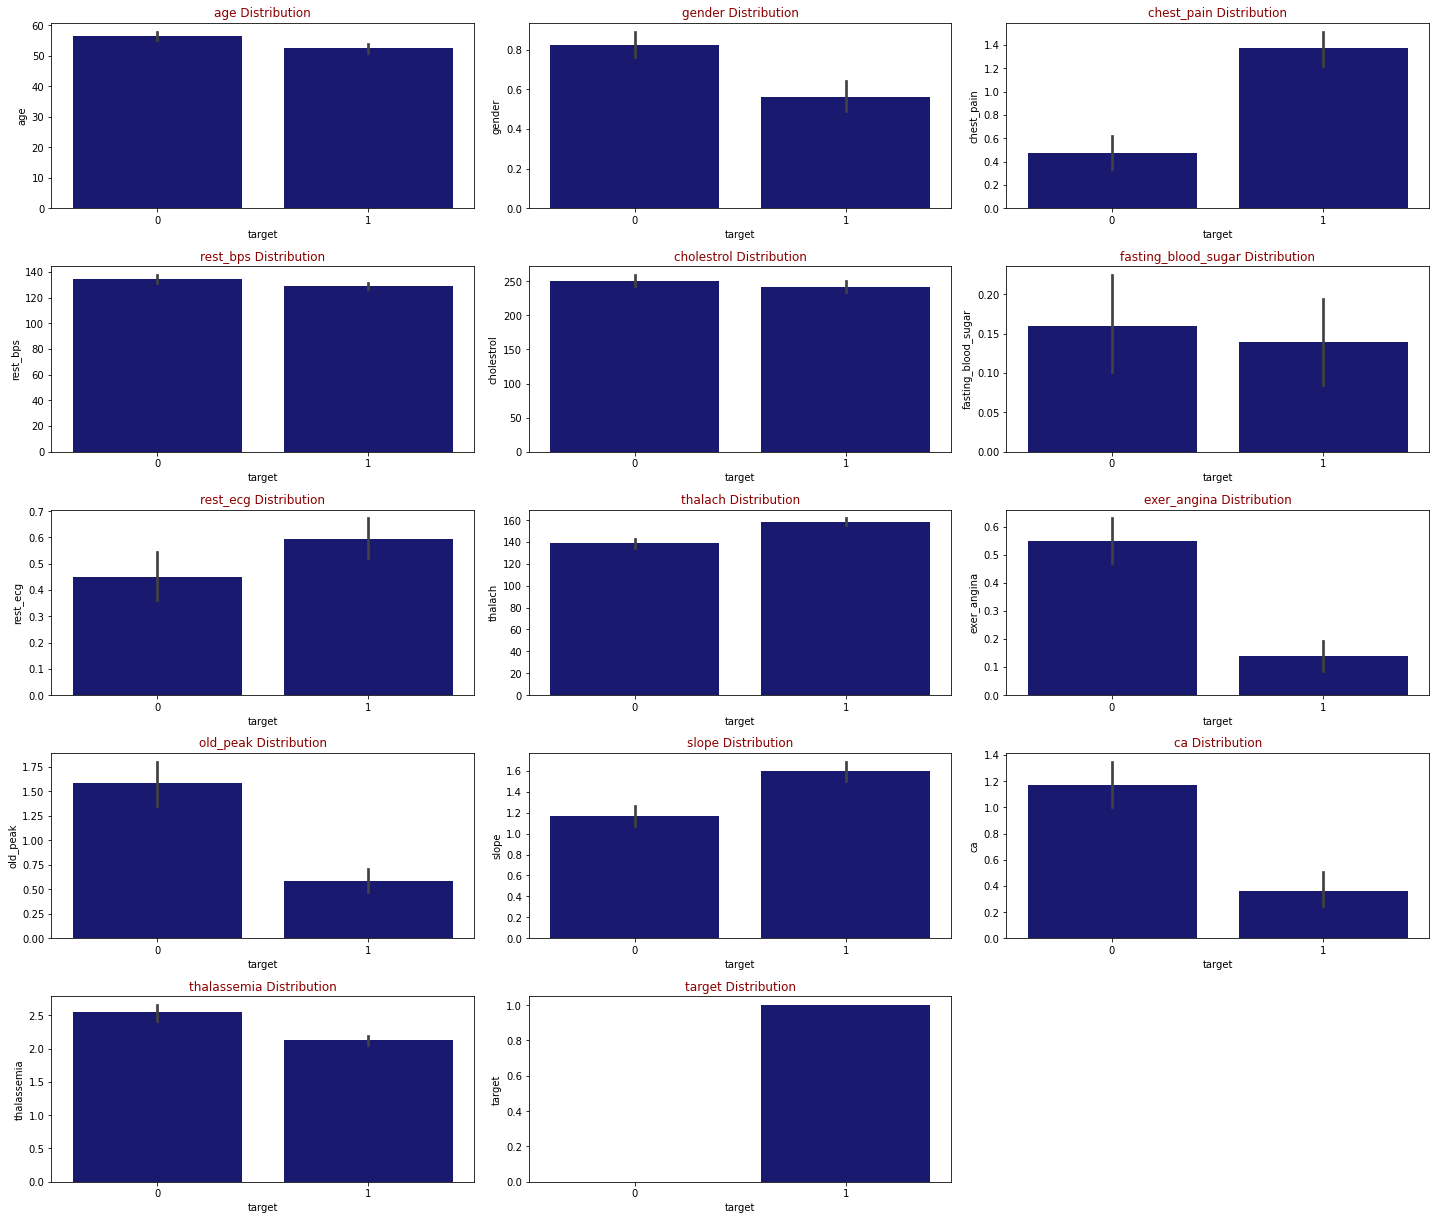

In [29]:
def draw_barplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.barplot(x = df['target'], y = df[feature], ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_barplot(df,df.columns,6,3)

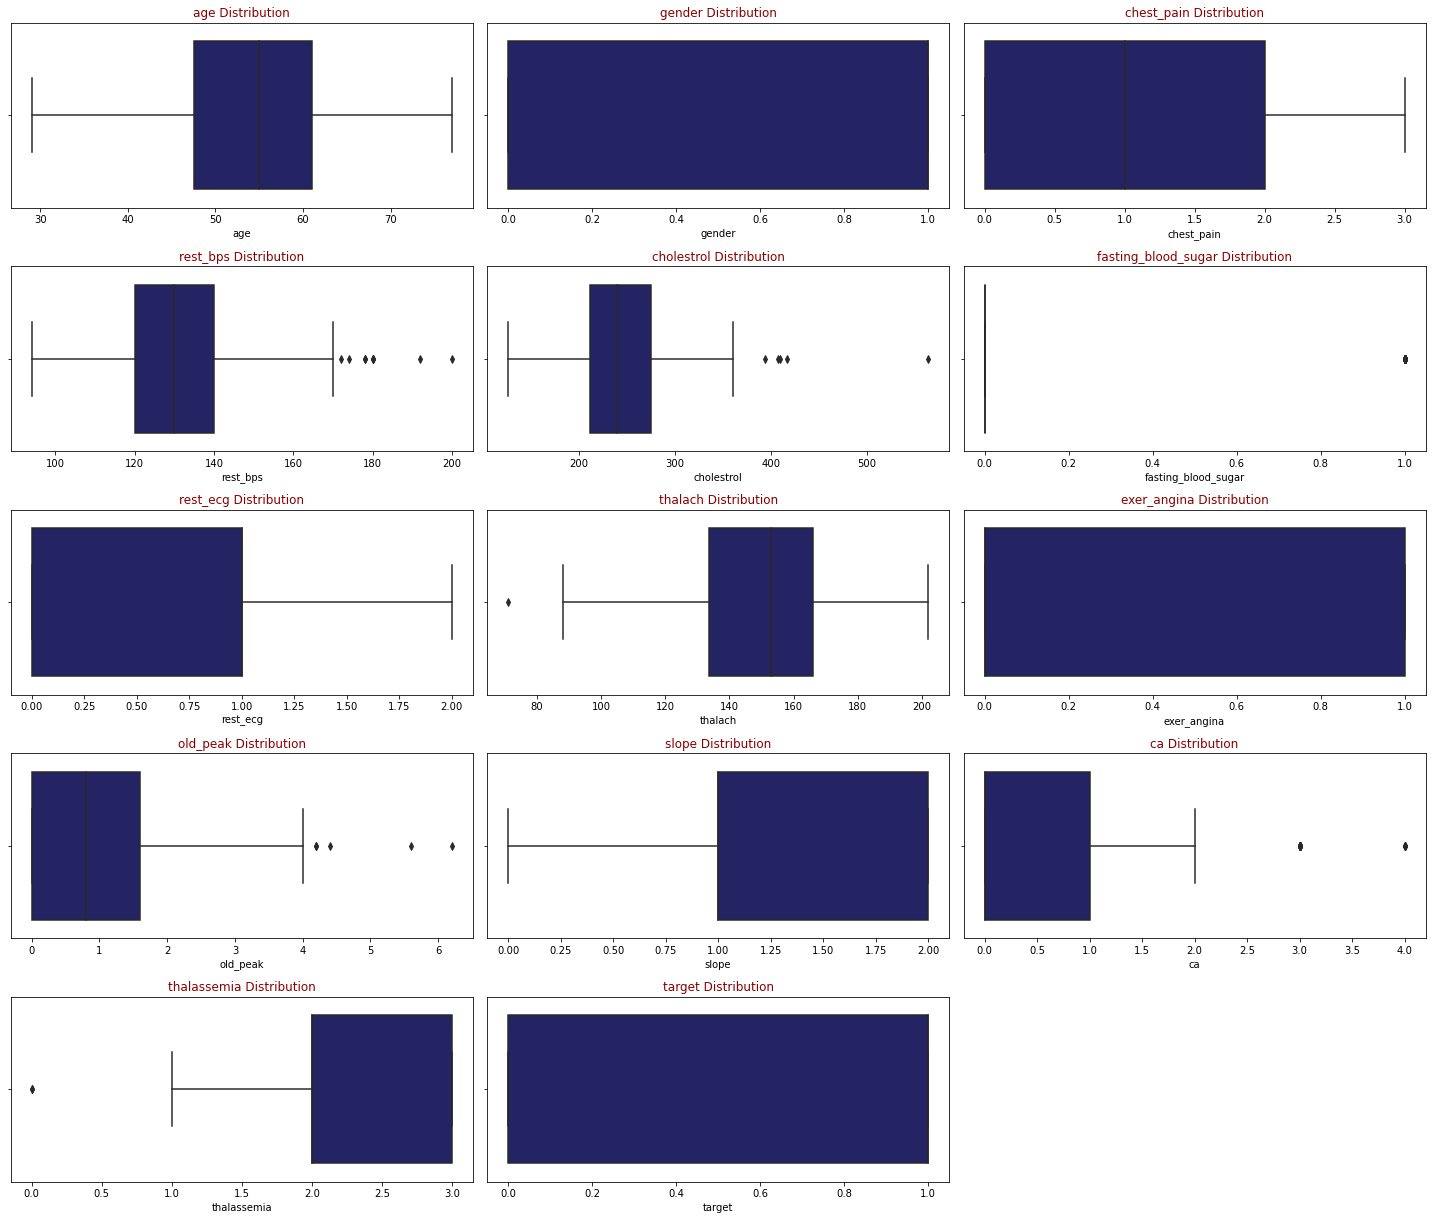

In [30]:
# visualizing the outliers
def draw_barplot(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        sns.boxplot(df[feature], ax=ax, color='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_barplot(df,df.columns,6,3)

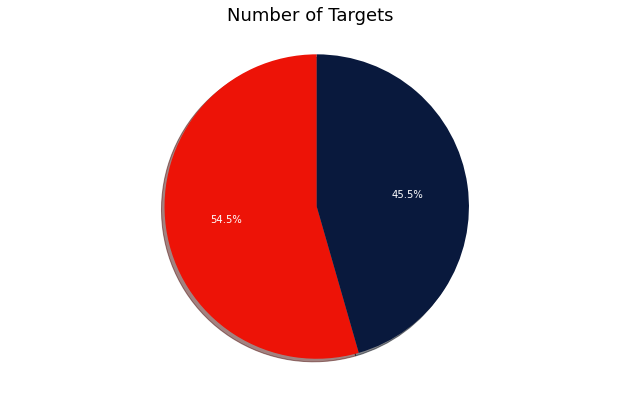

In [31]:
labels = ['More Chance of Heart Attack', 'Less Chance of Heart Attack']
sizes = df['target'].value_counts(sort = True)

colors = ["#ed1307","#09193d"]

plt.figure(figsize=(7,7))
plt.suptitle("Number of Targets",y=0.9, family='Sherif', size=18)
plt.pie(sizes, labels = labels, colors = colors, autopct ='%1.1f%%', shadow = True, startangle = 90, textprops={'color':"w"})
plt.show()

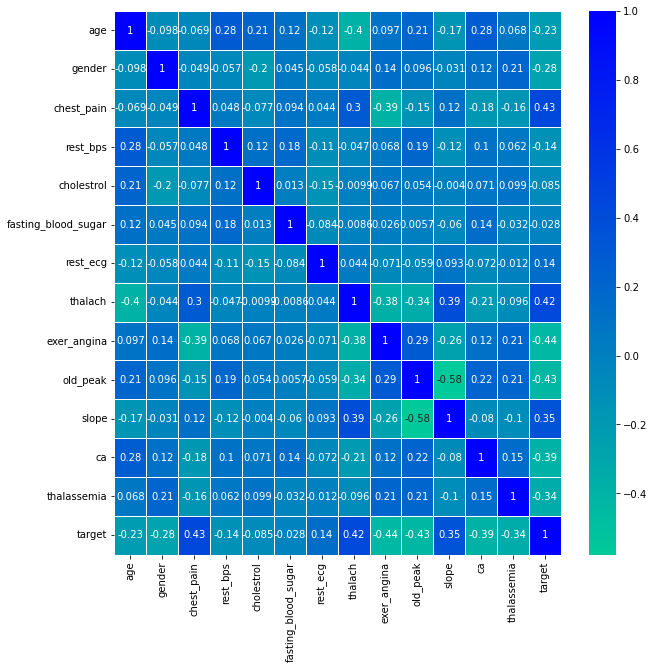

In [32]:
# HeatMap

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,center=0,cmap='winter_r')
plt.show()

# Models

# DecisionTree

In [33]:
# defining x and y
X = df.drop(['target'], axis=1)
# the dependent variable
y = df[['target']]

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=0)

In [35]:
dTree=DecisionTreeClassifier(criterion= 'gini',random_state=0)
dTree.fit(X_train , y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
dTree.score(X_train , y_train)

1.0

In [37]:
dTree.score(X_test , y_test)

0.7472527472527473

# with max depth

In [38]:
dTree=DecisionTreeClassifier(criterion= 'gini',max_depth=5,random_state=0)
dTree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [39]:
dTree.score(X_train , y_train)

0.9433962264150944

In [40]:
dTree.score(X_test , y_test)

0.7362637362637363

# with gini_index

In [41]:
dTree=DecisionTreeClassifier(criterion= 'gini',max_depth=3,random_state=0)
dTree.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [42]:
dTree.score(X_train , y_train)

0.8679245283018868

In [43]:
dTree.score(X_test , y_test)

0.8131868131868132

# with entropy

In [44]:
dTree=DecisionTreeClassifier(criterion= 'entropy',max_depth=3,random_state=0)
dTree.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [45]:
dTree.score(X_train , y_train)

0.8632075471698113

In [46]:
dTree.score(X_test , y_test)

0.7582417582417582

# Logistic Regression

In [47]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [48]:
predictions=model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8131868131868132

In [50]:
print(f'Train Score:  {model.score(X_train, y_train)}')
print(f'Train Score:  {model.score(X_test, y_test)}')

Train Score:  0.8584905660377359
Train Score:  0.8131868131868132


In [52]:
from sklearn import metrics

In [53]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.79      0.87      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[33, 11],
       [ 6, 41]], dtype=int64)

<AxesSubplot:>

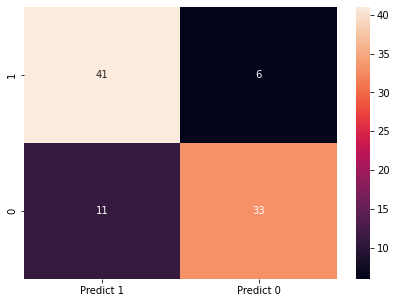

In [55]:
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')